In [26]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

from PIL import Image
import requests
from io import BytesIO

import highlight_text
# https://github.com/znstrider/highlight_text

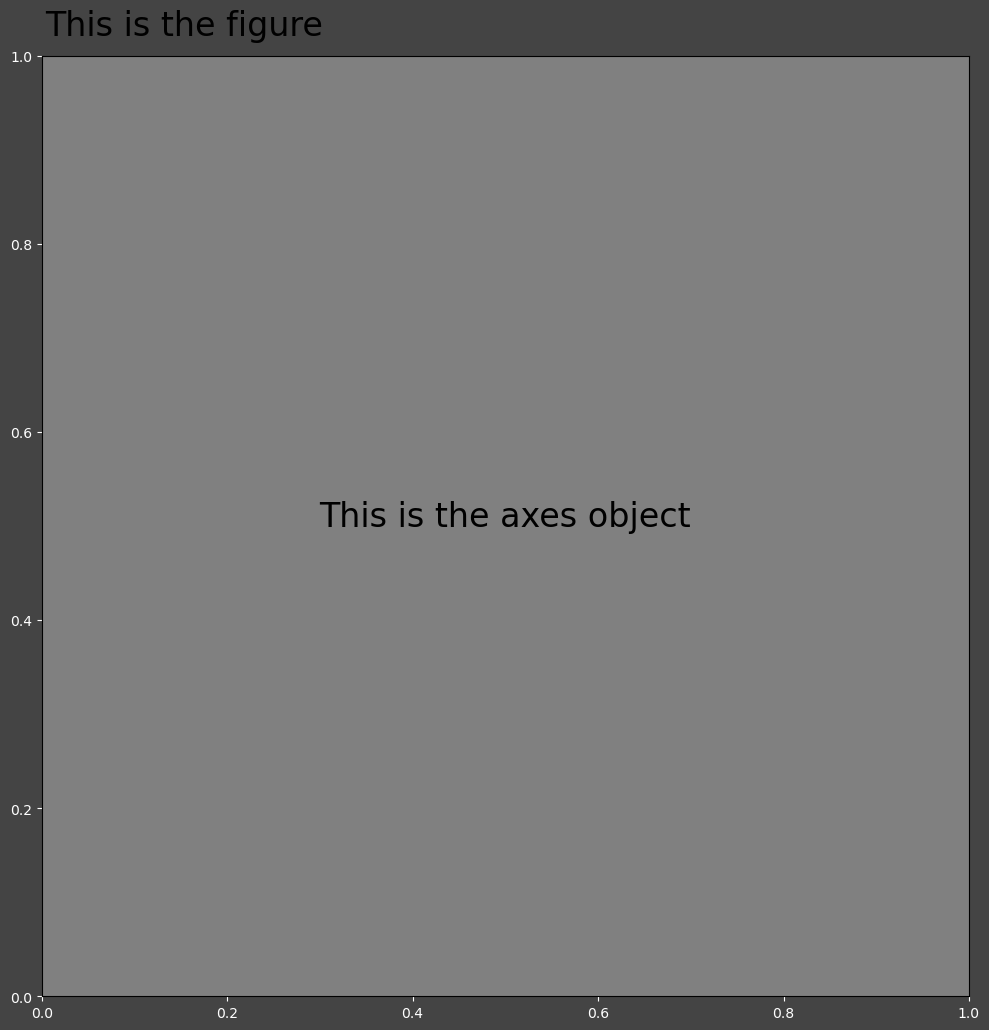

In [27]:
# Difference between figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

fig.set_facecolor('#444444')
ax.patch.set_facecolor('grey')

fig.text(0.05, 1, 'This is the figure', fontsize=24)
ax.text(0.5, 0.5, 'This is the axes object', fontsize=24, ha='center')

plt.tight_layout()
plt.show()

In [28]:
df = pd.read_csv("../petermckeever-data/pl_goal_summary_data.csv")
df.head(20)

,season_id,team,goals_for,goals_against,goal_diff,team_season
0,2010,Arsenal,72.0,43.0,29.0,Arsenal 2010/2011
1,2010,Aston Villa,48.0,59.0,-11.0,Aston Villa 2010/2011
2,2010,Birmingham,37.0,58.0,-21.0,Birmingham 2010/2011
3,2010,Blackburn,46.0,59.0,-13.0,Blackburn 2010/2011
4,2010,Blackpool,55.0,78.0,-23.0,Blackpool 2010/2011
5,2010,Bolton,52.0,56.0,-4.0,Bolton 2010/2011
6,2010,Chelsea,69.0,33.0,36.0,Chelsea 2010/2011
7,2010,Everton,51.0,45.0,6.0,Everton 2010/2011
8,2010,Fulham,49.0,43.0,6.0,Fulham 2010/2011
9,2010,Liverpool,59.0,44.0,15.0,Liverpool 2010/2011


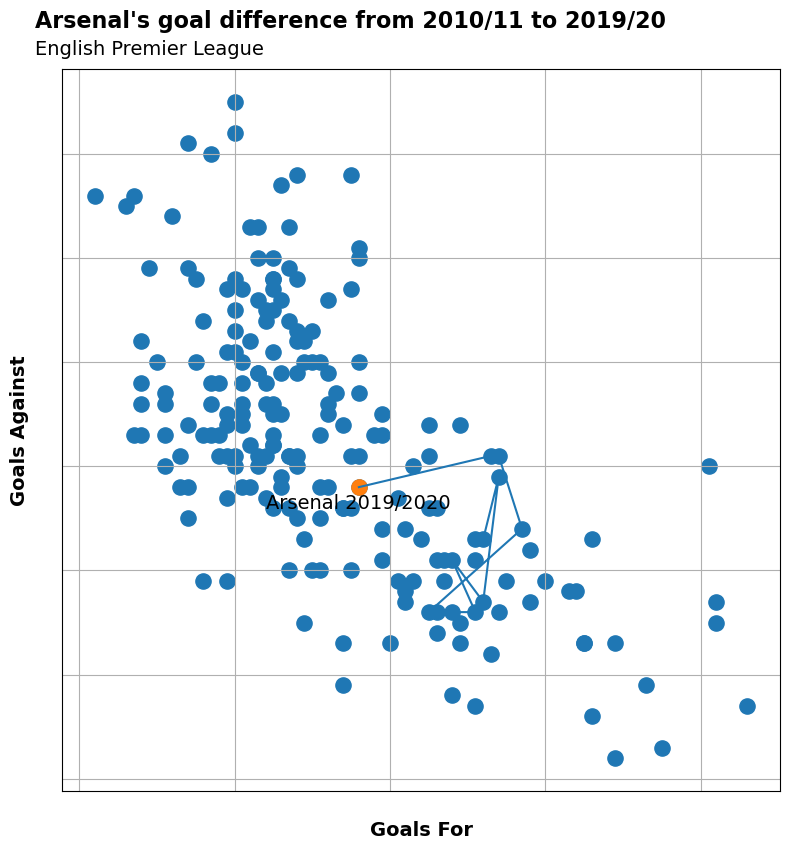

In [29]:
# selectiing team
team = "Arsenal"

# creating figure and axes
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")

# adding a grid
ax.grid()

# getting our data to plot

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120)

# getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

# plotting a line to track team's change over seasons
ax.plot(x,y)

# plotting team's most recent season
ax.scatter(x[-1],y[-1],s=120)
t = ax.text(x[-1],y[-1]-2,t[-1],color='k',fontsize=14, ha="center")

# adding title and subtitle
fig.text(0.05,1,"{}'s goal difference from 2010/11 to 2019/20\n".format(team), fontsize=16, fontweight="bold")        
fig.text(0.05,1,"English Premier League",fontweight="regular", fontsize=14)

# adding x and y labels
ax.set_xlabel("Goals For", fontweight="bold", fontsize=14)
ax.set_ylabel("Goals Against", fontweight="bold", fontsize= 14)


plt.tight_layout()
plt.show()

/var/folders/5d/_v0r0r510wncd2w765n36ksw0000gn/T/ipykernel_96319/4236930892.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


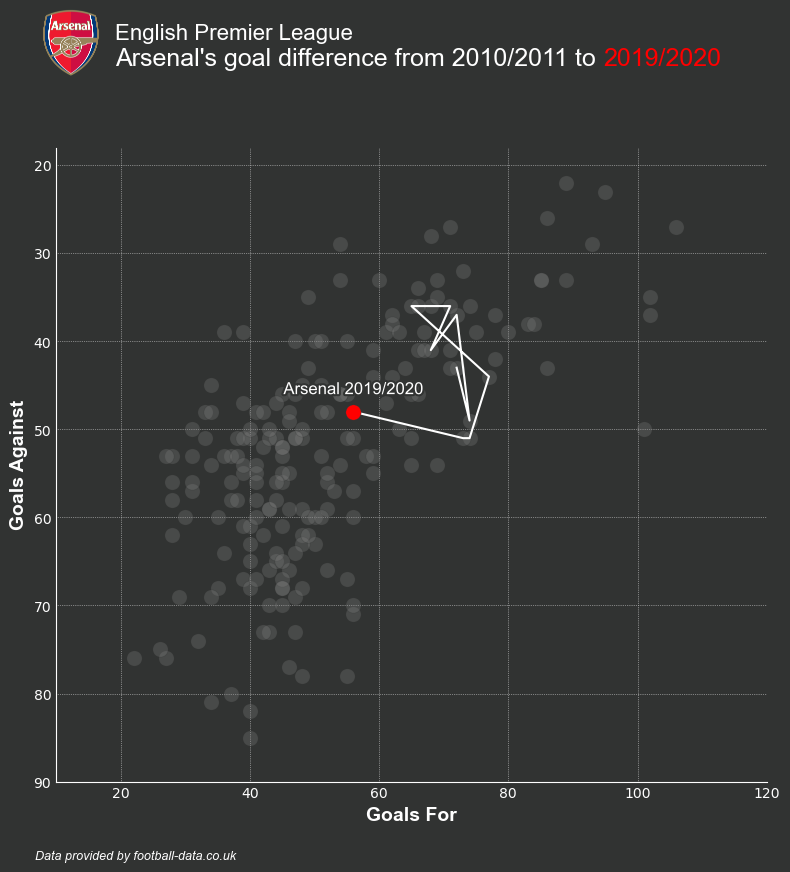

In [45]:
# Bovenstaande viz aangepast
team = "Arsenal"

title_font = "Arial"
body_font = "Arial"
text_color = "w"
background = "#313332"
filler = "grey"
primary = "red"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.3, lw=0.5, zorder=2)


x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

ax.plot(x,y, zorder=3, color=text_color)

ax.scatter(x[-1],y[-1],s=120,color=primary,edgecolors=background, alpha=1, lw=.25, zorder=4)
t = ax.text(x[-1],y[-1]-2,t[-1],color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])


ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

s = "{}'s goal difference from {} to <{}>"
highlight_textprops = [{
    "color": primary,
}]
highlight_text.fig_text(
    s=s.format(team,ssn_start,ssn_end), 
    x=0.15, 
    y=0.99, 
    highlight_textprops=highlight_textprops,
    fontsize=18, 
    fontfamily=title_font, 
    color=text_color
)

fig.text(0.15,1,"English Premier League",fontweight="regular", fontsize=16,fontfamily=title_font, color=text_color)

ax.set_xlabel("Goals For", fontfamily=title_font, fontweight="bold", fontsize=14, color=text_color)
ax.set_ylabel("Goals Against", fontfamily=title_font, fontweight="bold", fontsize= 14, color=text_color)

ax.tick_params(axis="both",length=0)

ax.set_ylim(90,18)
ax.set_xlim(10,120)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)




ax2 = fig.add_axes([0.02,0.92,0.15,0.15]) # badge
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Arsenal-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

fig.text(0.05, -0.025, "Data provided by football-data.co.uk",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)



plt.tight_layout()
plt.show()